# Lecture 8: Visualizing Proportions

Pie charts are used to show how parts relate to a whole. 
`ggplot2` does not have a dedicated `geom_pie()` function, 
so we construct pie charts by creating a bar chart with `geom_bar()` 
and transforming it into polar coordinates using `coord_polar("y")`.


In [1]:
library(ggplot2)
library(treemapify)
library(ggforce)

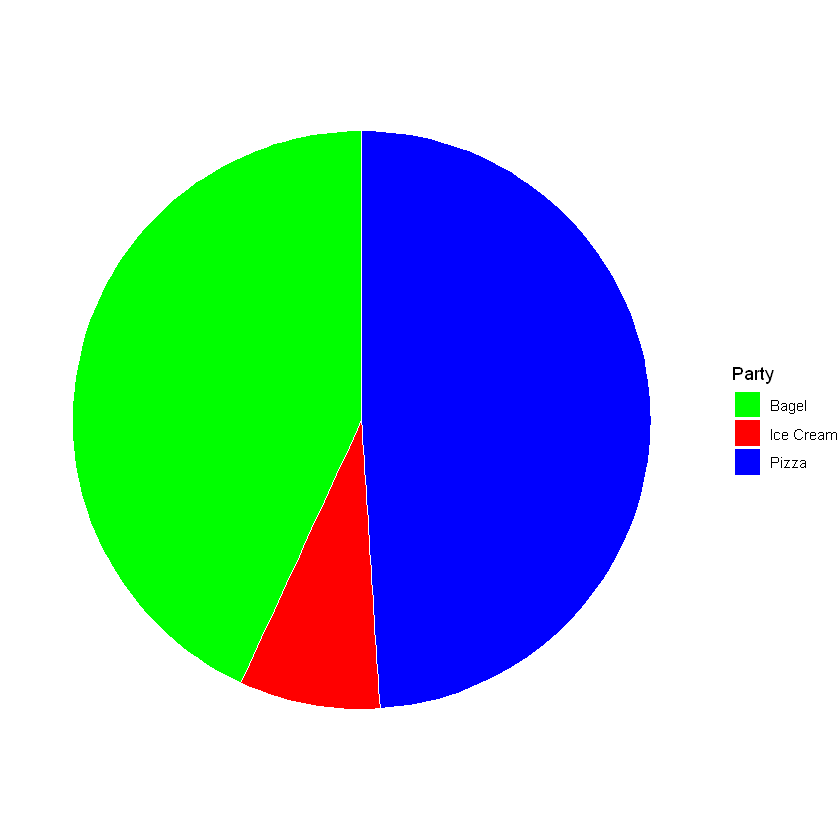

In [2]:
bundesdata <- data.frame(
  Party = c("Pizza", "Bagel", "Ice Cream"),
  value = c(243, 214, 39)
)

ggplot(bundesdata, aes(x = "", y = value, fill = Party)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("green", "red", "blue")) +
  theme_void()


Stacked density plots show how the proportions of categories change across a continuous variable (e.g. age).
This is done with `geom_density(position = "fill")`, which normalizes the density within each x-value so that it adds up to 100%.


Warning message:
"The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(count)` instead."


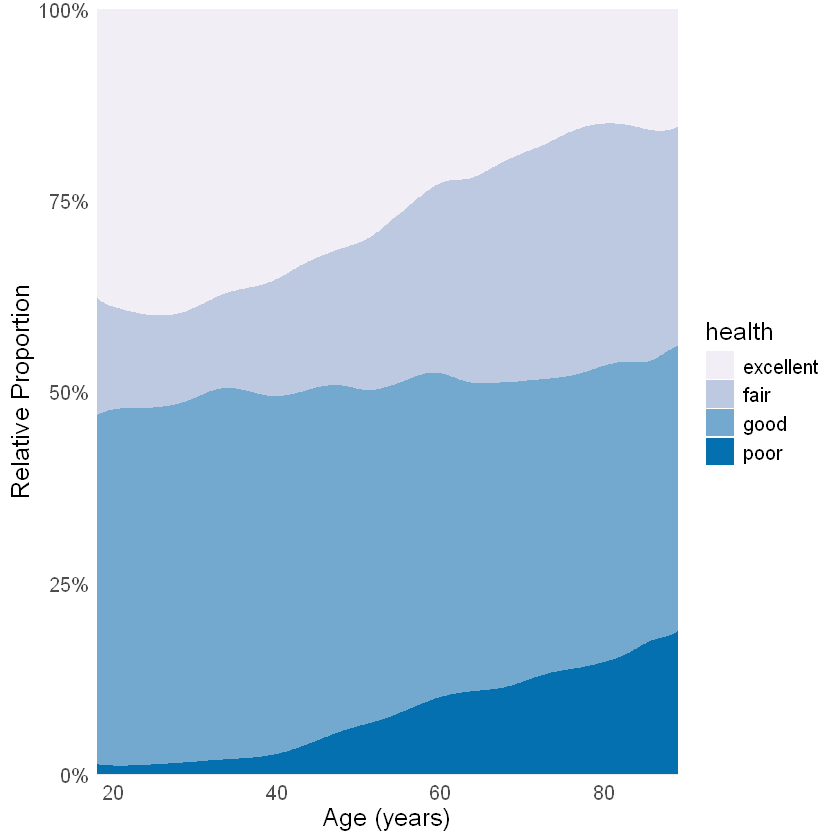

In [3]:
happy <- na.omit(read.csv("http://www.ics.uci.edu/~algol/teaching/informatics143w2021/happy.csv"))

ggplot(happy, aes(x = age, y = ..count.., fill = health, color = health)) + 
  geom_density(position = "fill") +
  scale_x_continuous(name = "Age (years)", expand = c(0, 0)) +
  scale_y_continuous(name = "Relative Proportion", labels = scales::percent, expand = c(0, 0)) +
  scale_fill_brewer(palette = "PuBu") + 
  scale_color_brewer(palette = "PuBu") +
  theme_minimal() +
  theme(text = element_text(size = 15))


Mosaic plots visualize proportions across two categorical variables. 
Each rectangle’s width represents one category on the x-axis, and its height shows how the second variable is distributed within it.
This can be built manually using `geom_bar(position = "fill")` and `facet_grid()` with adjusted widths.


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."


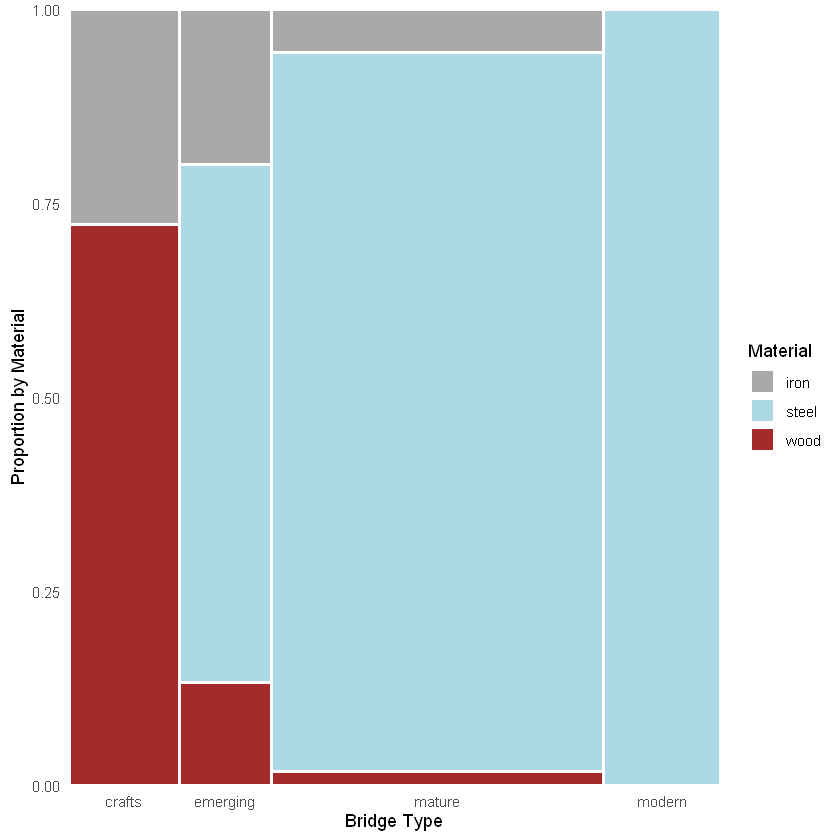

In [4]:
bridges <- read.csv("http://www.ics.uci.edu/~algol/teaching/informatics143w2021/bridges_tidy.csv")
bridges$group_count <- ave(bridges$count, bridges$erected, FUN = sum)

ggplot(bridges, aes(x = erected, y = count, width = group_count, fill = material)) +
  geom_bar(stat = "identity", position = "fill", color = "white", size = 1) +
  facet_grid(~erected, scales = "free_x", space = "free_x") +
  scale_y_continuous(expand = c(0, 0), name = "Proportion by Material") +
  scale_fill_manual(values = c("steel" = "lightblue", "iron" = "darkgray", "wood" = "brown")) +
  labs(x = "Bridge Type", fill = "Material") +
  theme_minimal() +
  theme(strip.text = element_blank(),
        panel.spacing.x = unit(0, "pt"),
        legend.position = "right")



Treemaps display hierarchical proportions using nested rectangles.
Each rectangle’s area reflects a quantitative variable, and rectangles can be grouped by categories using `subgroup`.
This treemap shows how different departments allocate their budget across internal projects.


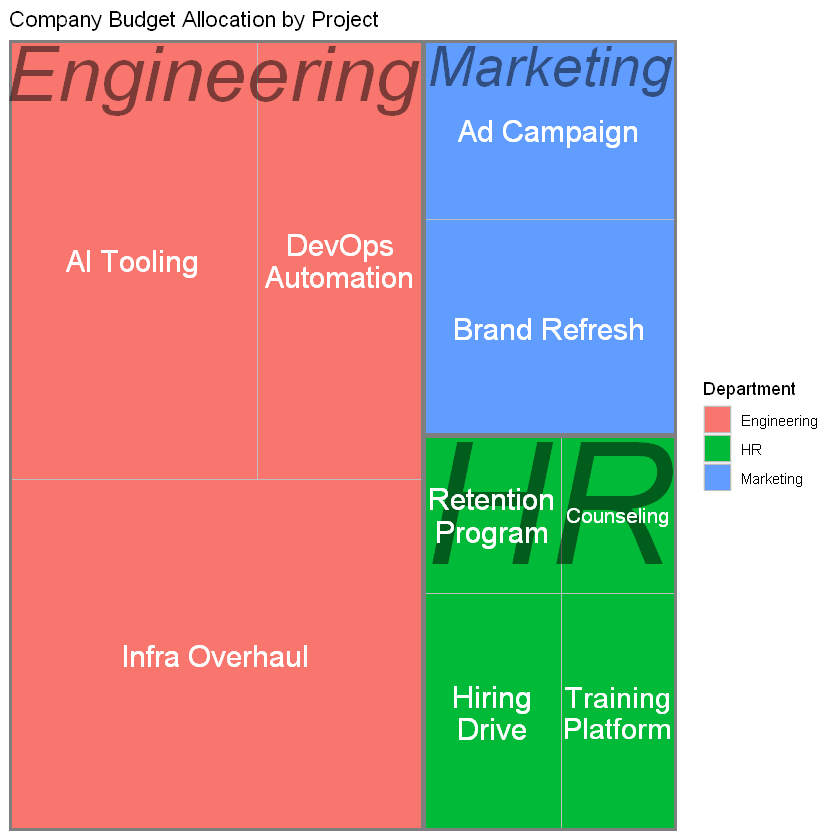

In [5]:


company_projects <- data.frame(
  department = c("Engineering", "Engineering", "Engineering",
                 "Marketing", "Marketing",
                 "HR", "HR", "HR", "HR"),
  project = c("Infra Overhaul", "AI Tooling", "DevOps Automation",
              "Brand Refresh", "Ad Campaign",
              "Hiring Drive", "Retention Program", "Counseling", "Training Platform"),
  budget_k = c(800, 600, 400, 300, 250, 180, 120, 100, 150)
)

ggplot(company_projects, aes(area = budget_k, fill = department,
                              label = project, subgroup = department)) +
  geom_treemap() +
  geom_treemap_subgroup_border() +
  geom_treemap_subgroup_text(place = "topright", grow = TRUE,
                              alpha = 0.5, colour = "black",
                              fontface = "italic", min.size = 0) +
  geom_treemap_text(colour = "white", place = "centre", reflow = TRUE) +
  labs(title = "Company Budget Allocation by Project",
       fill = "Department") +
  theme(legend.position = "right")


Parallel sets visualize how data flows across multiple categorical variables.
Each axis shows a category, and bands indicate how values transition across variables.


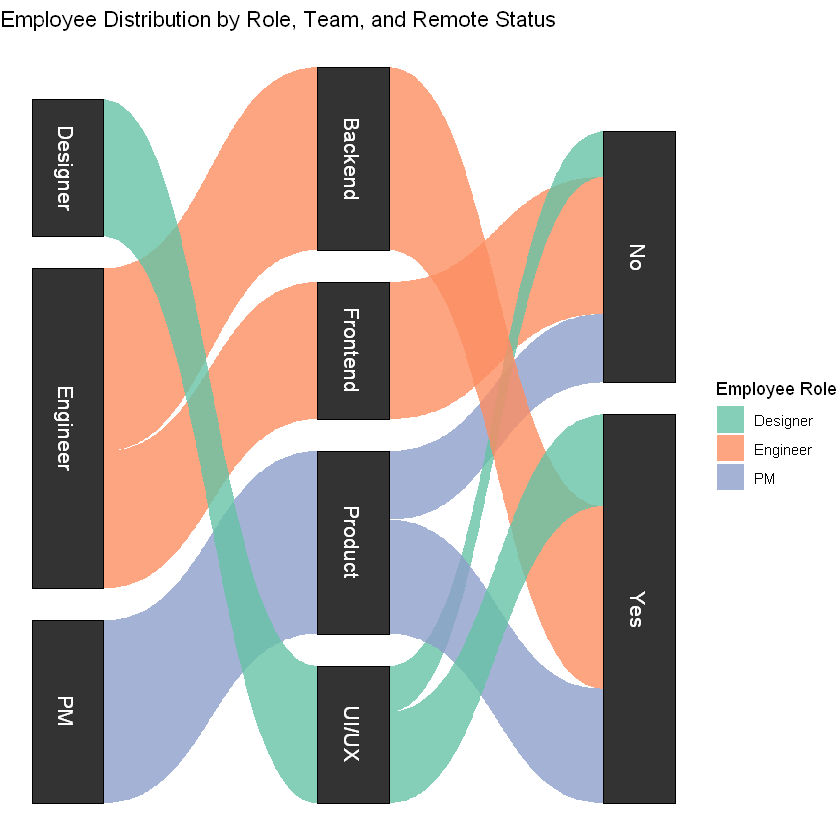

In [6]:

# Data
employee_data <- data.frame(
  Role = c("Engineer", "Engineer", "Designer", "Designer", "PM", "PM"),
  Team = c("Backend", "Frontend", "UI/UX", "UI/UX", "Product", "Product"),
  Remote = c("Yes", "No", "Yes", "No", "Yes", "No"),
  Count = c(40, 30, 20, 10, 25, 15)
)

long_data <- employee_data[rep(1:nrow(employee_data), employee_data$Count), ]
long_data$id <- seq_len(nrow(long_data))

set_data <- ggforce::gather_set_data(long_data, 1:3)

# Plot with slightly lowered axis headers
ggplot(set_data, aes(x = x, id = id, split = y, value = 1)) +
  geom_parallel_sets(aes(fill = Role), alpha = 0.8, axis.width = 0.25) +
  geom_parallel_sets_axes(axis.width = 0.25, fill = "gray20", color = "black") +
  geom_parallel_sets_labels(colour = "white", size = 4.5) +
  scale_fill_brewer(palette = "Set2") +
  # Lowered axis titles
  labs(title = "Employee Distribution by Role, Team, and Remote Status",
       fill = "Employee Role") +
  coord_cartesian(clip = "off") +
  theme_void()


# Lecture 9: Relationships Between Variables

Scatterplots are used to visualize the relationship between two numeric variables.
Bubble charts are an extension of scatterplots where a third variable is mapped to point size.

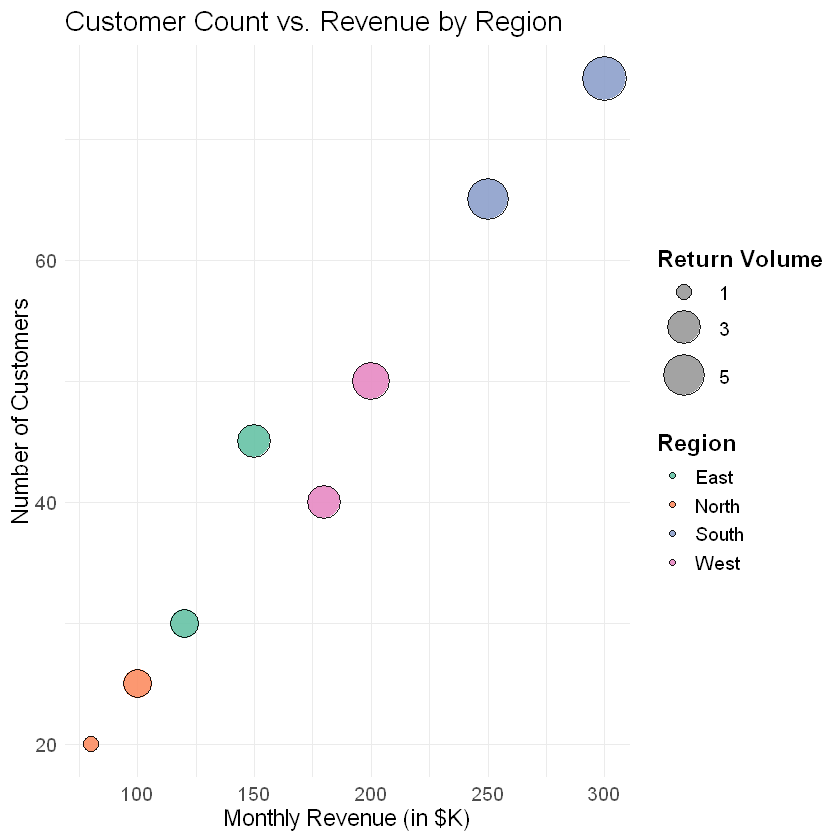

In [7]:

products <- data.frame(
  Revenue = c(120, 200, 150, 80, 300, 250, 100, 180),
  Customers = c(30, 50, 45, 20, 75, 65, 25, 40),
  Returns = c(2, 4, 3, 1, 6, 5, 2, 3),
  Region = c("East", "West", "East", "North", "South", "South", "North", "West")
)

ggplot(products, aes(x = Revenue, y = Customers)) +
  geom_point(aes(size = Returns, fill = Region), 
             shape = 21, color = "black", stroke = 0.8, alpha = 0.9) +
  scale_size_continuous(
    name = "Return Volume",
    range = c(4, 12),
    breaks = c(1, 3, 5),
    guide = guide_legend(override.aes = list(fill = "gray60", color = "black"))
  ) +
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Customer Count vs. Revenue by Region",
    x = "Monthly Revenue (in $K)",
    y = "Number of Customers",
    fill = "Region"
  ) +
  theme_minimal() +
  theme(
    text = element_text(size = 14),
    legend.box = "vertical",
    legend.title = element_text(face = "bold"),
    legend.spacing.y = unit(6, "pt")
  )


Correlograms visualize the correlation matrix between numeric variables.
Each cell encodes the correlation value (from -1 to 1) using color.
You can build correlograms manually using `geom_tile()` or use base R methods like `corrplot()` or `ellipse::plotcorr()`.


In [8]:
n <- 100

marketing <- data.frame(
  Impressions = rnorm(n, mean = 1000, sd = 200)
)
marketing$Clicks <- marketing$Impressions * 0.1 + rnorm(n, 0, 15)

marketing$Conversions <- marketing$Clicks * 0.3 + rnorm(n, 0, 10)

marketing$BounceRate <- 80 - marketing$Conversions * 1.2 + rnorm(n, 0, 5)

marketing$CTR <- marketing$Clicks / marketing$Impressions * 100


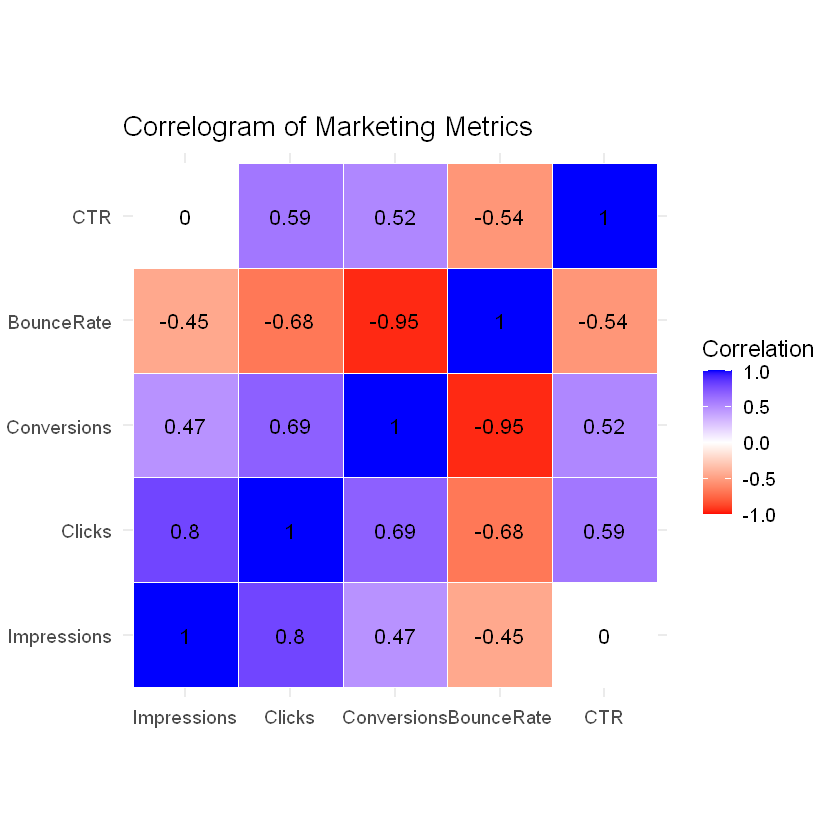

In [9]:
cor_matrix <- round(cor(marketing), 2)
cor_df <- as.data.frame(as.table(cor_matrix))
colnames(cor_df) <- c("Var1", "Var2", "Correlation")

ggplot(cor_df, aes(Var1, Var2, fill = Correlation)) +
  geom_tile(color = "white") +
  geom_text(aes(label = Correlation), color = "black", size = 4.5) +
  scale_fill_gradient2(
    low = "red", mid = "white", high = "blue",
    midpoint = 0, limits = c(-1, 1)
  ) +
  labs(title = "Correlogram of Marketing Metrics", x = NULL, y = NULL) +
  coord_fixed() +
  theme_minimal(base_size = 14)


PCA is a dimensionality reduction technique that transforms correlated variables into a new set of uncorrelated variables called principal components.
These components capture the directions of maximum variance in the data.
We use `prcomp()` to compute the PCA and then plot the data in the space of the first two principal components.


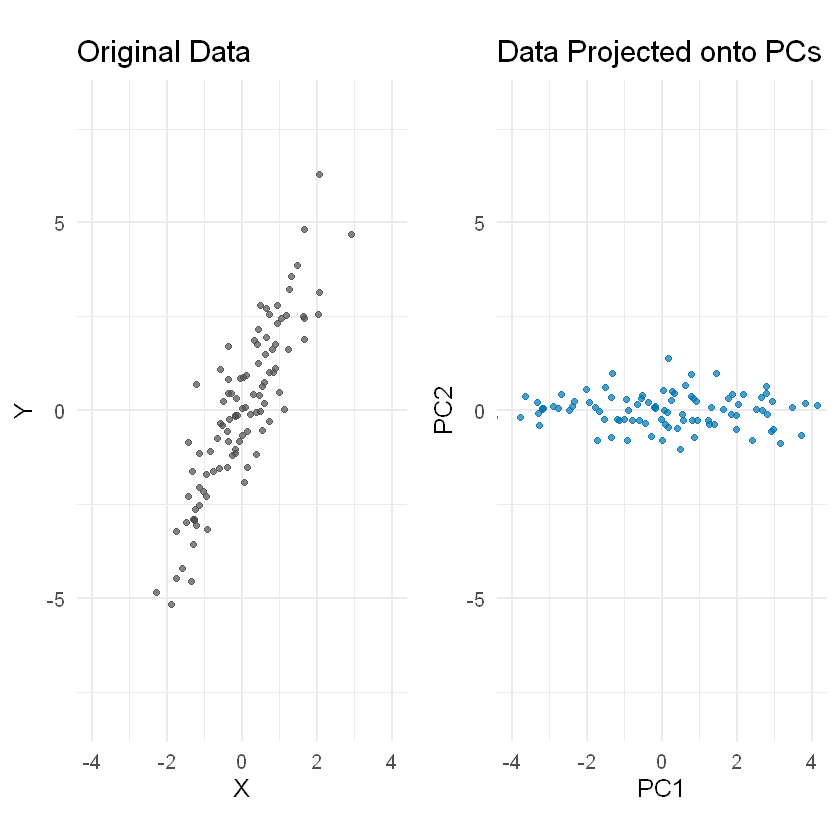

In [10]:
n <- 100
x <- rnorm(n)
y <- 2 * x + rnorm(n, 0, 1)
df <- data.frame(x = x, y = y)

pca <- prcomp(df, center = TRUE, scale. = FALSE)
df_centered <- as.data.frame(scale(df, center = TRUE, scale = FALSE))
pca_proj <- as.data.frame(pca$x)

xlim <- c(-4, 4)
ylim <- c(-8, 8)

plot1 <- ggplot(df_centered, aes(x, y)) +
  geom_point(color = "gray30", alpha = 0.7) +
  labs(title = "Original Data", x = "X", y = "Y") +
  coord_fixed(xlim = xlim, ylim = ylim) +
  theme_minimal(base_size = 15)

plot2 <- ggplot(pca_proj, aes(PC1, PC2)) +
  geom_point(color = "#0072B2", alpha = 0.7) +
  labs(title = "Data Projected onto PCs", x = "PC1", y = "PC2") +
  coord_fixed(xlim = xlim, ylim = ylim) +
  theme_minimal(base_size = 15)

gridExtra::grid.arrange(grobs = list(plot1, plot2), ncol = 2)


Paired data compares two measurements taken from the same unit (e.g., before vs. after, left vs. right).
Two common plots for paired data are:
- A **paired scatterplot** with a diagonal reference line (y = x)
- A **slopegraph** that shows change between two conditions per subject


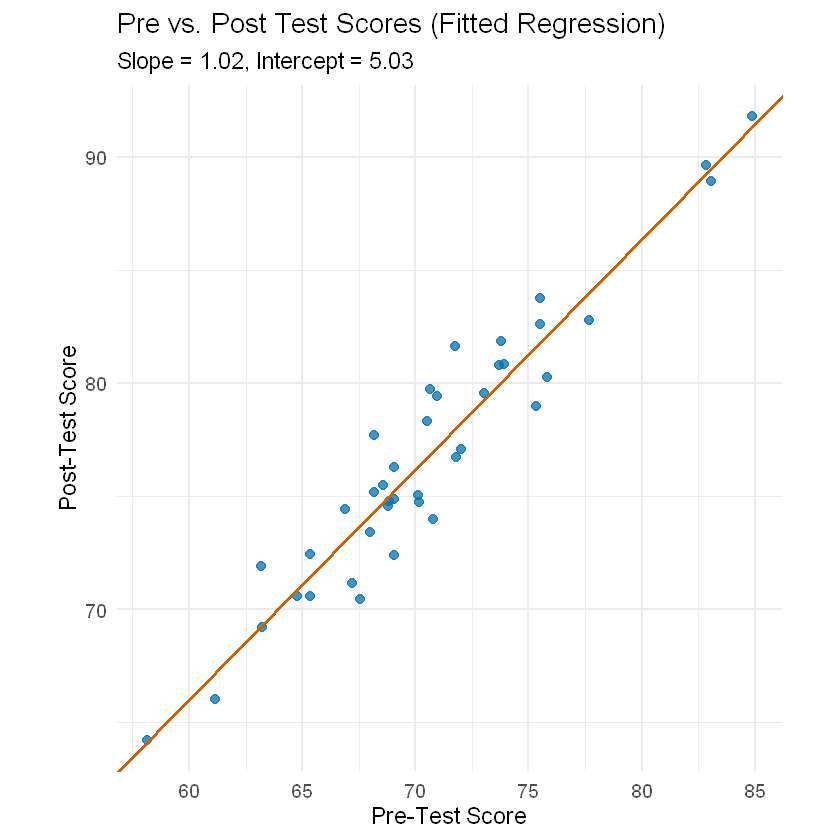

In [11]:

n <- 40
pre <- rnorm(n, mean = 70, sd = 6)
improvement <- abs(rnorm(n, mean = 6, sd = 2))
post <- pre + improvement

df <- data.frame(
  Student = paste0("S", 1:n),
  PreTest = pre,
  PostTest = post
)

fit <- lm(PostTest ~ PreTest, data = df)
coef_vals <- coef(fit)  

ggplot(df, aes(x = PreTest, y = PostTest)) +
  geom_point(size = 2.5, color = "#0072B2", alpha = 0.75) +
  geom_abline(
    slope = coef_vals["PreTest"],
    intercept = coef_vals["(Intercept)"],
    color = "#D55E00",
    size = 1,
    linetype = "solid"
  ) +
  labs(
    title = "Pre vs. Post Test Scores (Fitted Regression)",
    subtitle = paste0("Slope = ", round(coef_vals["PreTest"], 2),
                      ", Intercept = ", round(coef_vals["(Intercept)"], 2)),
    x = "Pre-Test Score",
    y = "Post-Test Score"
  ) +
  coord_fixed() +
  theme_minimal(base_size = 14)


# Lecture 10: Time Series

A single time series shows how a measurement changes over time.
We use `geom_line()` to connect points and optionally `geom_point()` to show actual observations.
This example uses synthetic data showing daily temperature changes.


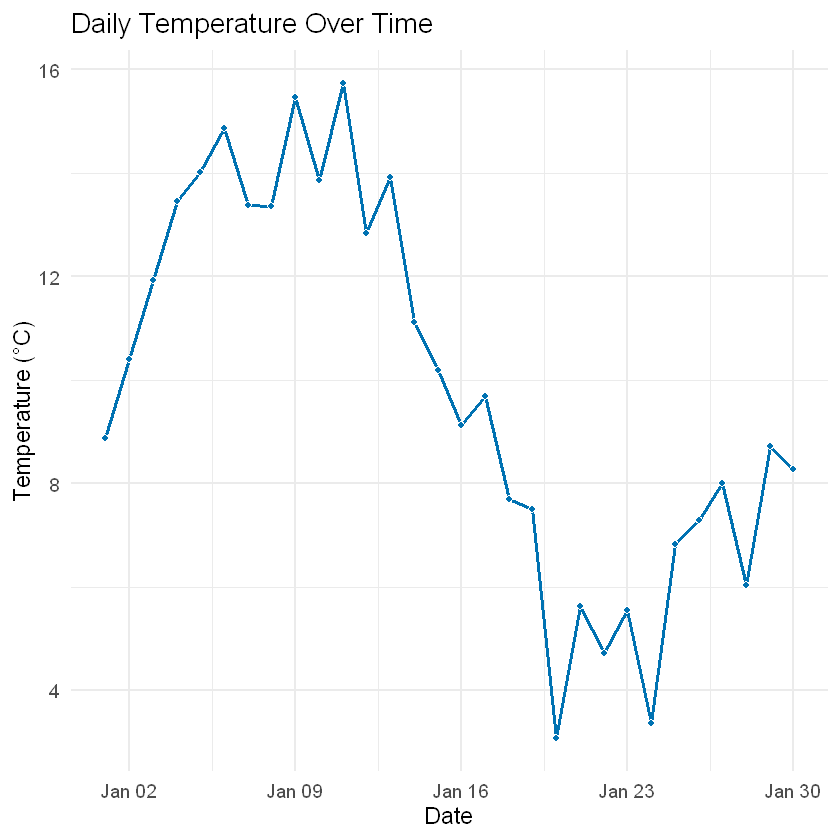

In [12]:
days <- seq.Date(from = as.Date("2023-01-01"), by = "day", length.out = 30)
temperature <- 10 + sin(seq(0, 2 * pi, length.out = 30)) * 5 + rnorm(30, 0, 1)

df <- data.frame(Date = days, Temperature = temperature)

ggplot(df, aes(x = Date, y = Temperature)) +
  geom_line(color = "#0072B2", linewidth = 1) +
  geom_point(color = "white", fill = "#0072B2", size = 2, shape = 21, stroke = 0.5) +
  labs(
    title = "Daily Temperature Over Time",
    x = "Date",
    y = "Temperature (°C)"
  ) +
  theme_minimal(base_size = 14)


Multiple time series plots compare trends across different groups or categories over time.
We can use color, line type, or shape to distinguish groups.
This example shows daily temperature trends for three cities.


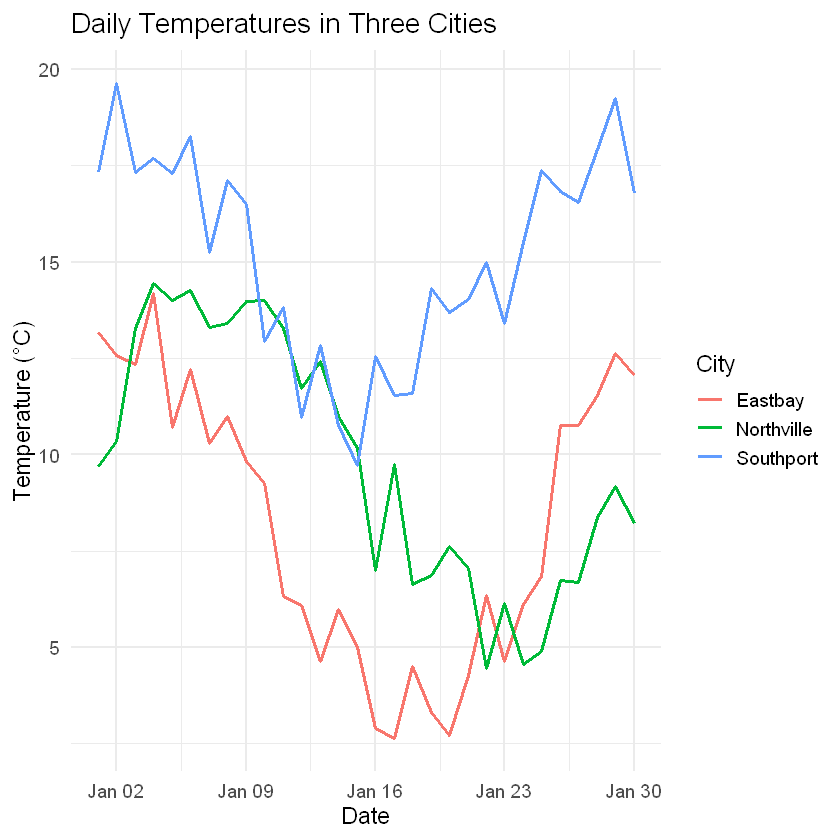

In [13]:
n_days <- 30
dates <- seq.Date(from = as.Date("2023-01-01"), by = "day", length.out = n_days)

df <- data.frame(
  Date = rep(dates, times = 3),
  City = rep(c("Northville", "Southport", "Eastbay"), each = n_days),
  Temp = c(
    10 + sin(seq(0, 2*pi, length.out = n_days)) * 4 + rnorm(n_days, 0, 1),
    15 + cos(seq(0, 2*pi, length.out = n_days)) * 3 + rnorm(n_days, 0, 1),
    8 + sin(seq(0, 2*pi, length.out = n_days) + 1) * 5 + rnorm(n_days, 0, 1)
  )
)

ggplot(df, aes(x = Date, y = Temp, color = City)) +
  geom_line(linewidth = 1) +
  labs(
    title = "Daily Temperatures in Three Cities",
    x = "Date",
    y = "Temperature (°C)",
    color = "City"
  ) +
  theme_minimal(base_size = 14)


Sometimes you want to plot multiple different variables that share the same time axis but are on different scales.
You can:
- Use **facets** to show each variable separately but aligned,
- Or use a **secondary y-axis** if needed (not always recommended).

Here we simulate a dataset with daily temperature and daily humidity over 30 days.


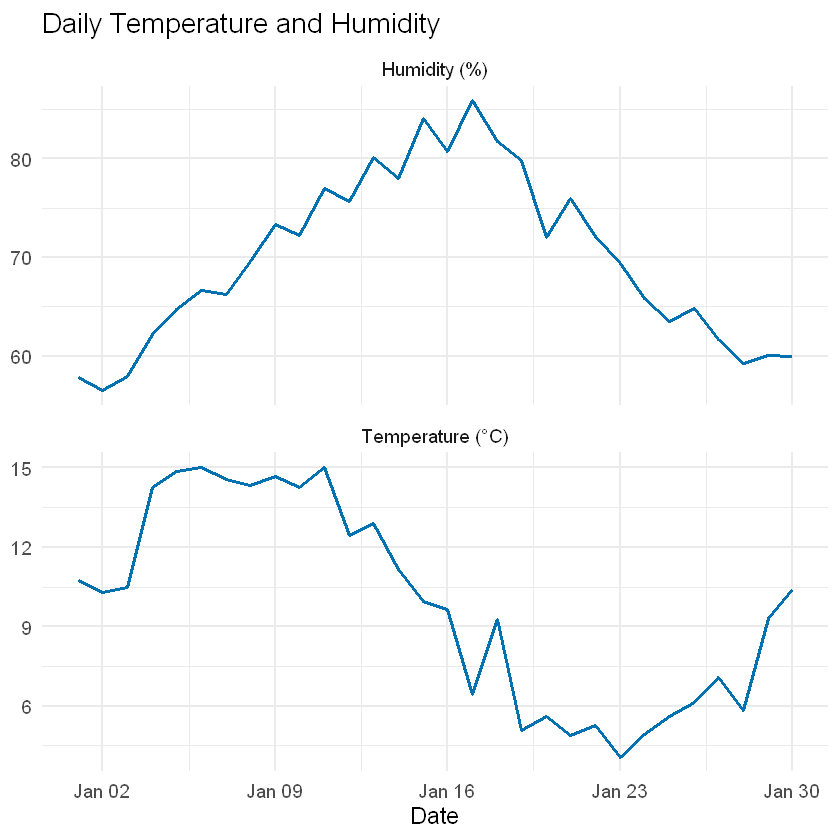

In [14]:
n_days <- 30
dates <- seq.Date(from = as.Date("2023-01-01"), by = "day", length.out = n_days)

temperature <- 10 + sin(seq(0, 2*pi, length.out = n_days)) * 5 + rnorm(n_days, 0, 1)
humidity <- 70 - cos(seq(0, 2*pi, length.out = n_days)) * 10 + rnorm(n_days, 0, 2)

df <- data.frame(
  Date = rep(dates, times = 2),
  Metric = rep(c("Temperature (°C)", "Humidity (%)"), each = n_days),
  Value = c(temperature, humidity)
)

ggplot(df, aes(x = Date, y = Value)) +
  geom_line(color = "#0072B2", linewidth = 1) +
  facet_wrap(~Metric, ncol = 1, scales = "free_y") +
  labs(
    title = "Daily Temperature and Humidity",
    x = "Date",
    y = NULL
  ) +
  theme_minimal(base_size = 14)
